In [1]:
# Import library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Loading and Data Exploration

---------

## Load Data

We are using dataset from kaggle named "Used Car Auction Prices".

In [2]:
# Import dataset
dfcar = pd.read_csv('https://drive.google.com/uc?id=1JvOkIqY4hPwsiBHysrIwxO5Wikerti3v', on_bad_lines="skip")
dfcar.head(3)

year make     model        trim   body transmission                vin  \
0  2015  Kia   Sorento          LX    SUV    automatic  5xyktca69fg566472   
1  2015  Kia   Sorento          LX    SUV    automatic  5xyktca69fg561319   
2  2014  BMW  3 Series  328i SULEV  Sedan    automatic  wba3c1c51ek116351   

  state  condition  odometer  color interior  \
0    ca        5.0   16639.0  white    black   
1    ca        5.0    9393.0  white    beige   
2    ca        4.5    1331.0   gray    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america, inc  20500         21500   
1                 kia motors america, inc  20800         21500   
2  financial services remarketing (lease)  31900         30000   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)

**List of features of the dataset:**

1. Year : The year of production of the cars.
2. Make : The brand of the car.
3. Model : The edition of the car of a specific brand.
4. Trim : The trim levels for a car are just different versions of the model.
5. Body : he body style of a vehicle refers to the shape and model of a particular car make.
6. Transmission : The mechanism that moves the power from the engine to the wheels.
7. VIN : Vehichel identification number.
8. State : The state in which the car is auctioned.
9. Condition : The condition of the cars being at the time of auction.
10. Odometer : The distance the car has travelled since manufactured.
11. Color : Exterior color of the car.
12. Interior : Interior color of the car.
13. Seller : The seller of the car (car dealers).
14. **MMR : Manheim Market Report, Manhiem market record, the market estimated price of the cars.**
15. Sellingprice : The price a car was sold at auctions.
16. Saledate : The date on which the car has been sold.


## Data Exploration

In [3]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


1. Total data: 558,811 entries.
2. There are various type of data in the dataset such as int, float, and object. in the `saledate` column, the data type would be changed to datetime  
3. There are Null values in several features.

In [4]:
# Checking for Null values
dfcar.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

9 features have Null values, such as `make`, `model`, `trim`, `body`, `transmission`, `condition`, `odometer`, `color`, and `interior`. so, further action seeds to be taken during Data Cleaning.

In [5]:
# Duplicate check:
dfcar.duplicated().sum()

0

No duplicate data was found.

In [6]:
# Categorize features based on data types
num = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cat = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

# Set the decimal number limit to only 3 digits
pd.set_option('display.float_format', lambda x: '%.3f' % x)

dfcar[num].describe()

year  condition   odometer        mmr  sellingprice
count 558811.000 547017.000 558717.000 558811.000    558811.000
mean    2010.039      3.425  68323.196  13769.325     13611.262
std        3.967      0.949  53397.753   9679.875      9749.657
min     1982.000      1.000      1.000     25.000         1.000
25%     2007.000      2.700  28374.000   7100.000      6900.000
50%     2012.000      3.600  52256.000  12250.000     12100.000
75%     2013.000      4.200  99112.000  18300.000     18200.000
max     2015.000      5.000 999999.000 182000.000    230000.000

1. `condition`, value between 1-5.
2. The `odometer` value appears to have a considerable distance between min and max, where the min value is 1, and the maximum is almost 1 million. Of course, this is something that seems odd. Apart from that, the mean and median values are also very far apart, namely 16,000.
3. Overall, the `mmr` and `sellingprice` values are not significantly different. However, the min-max and mean-median values are very far apart, so further attention needs to be paid to the next stage.
4. Some columns in the numerical feature also have null values, so they must be handled at the next stage.

In [7]:
dfcar[cat].describe()

make   model    trim    body transmission                vin  \
count   548510  548412  548160  545616       493458             558811   
unique      96     973    1975      86            2             550296   
top       Ford  Altima    Base   Sedan    automatic  wbanv13588cz57827   
freq     93554   19349   55817  199437       475914                  5   

         state   color interior              seller  \
count   558811  558062   558062              558811   
unique      38      20       17               14264   
top         fl   black    black  nissan-infiniti lt   
freq     82945  110970   244325               19693   

                                       saledate  
count                                    558811  
unique                                     3745  
top     Tue Feb 10 2015 01:30:00 GMT-0800 (PST)  
freq                                       5334

1. From the data above, we can see what values are the top ones, which appear frequently, and how many unique values each feature has.
2. For example, Ford is the most popular `make` among 96 other brands. Apart from that, the sedan `body` is also one of the most favorite.
3. Automatic `transmissions` are more sought after than manuals by more than 90%.
4. Black dominates both the exterior and interior colors.

----------

# EDA (Exploratory Data Analysis)

-------

At this stage, we will analyze both univariate and multivariate analysis.

## UNIVARIATE ANALYSIS

### Unique Value From Some Features

In [8]:
# Checking unique value for 'year' Column
dfcar['year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987,
       1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982,
       1983], dtype=int64)

All values are appropriate, namely in the form of numbers starting from 1982 to 2015.

In [9]:
# Checking unique value for 'make' Column
dfcar['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

There is a null value in the `make` feature. Apart from that, the value of the `make` column is still too diverse, where there are words with capital letters, words containing all capital letters, and words containing all lowercase. Therefore, we will change the values to all lowercase in the next stage. The same thing might also happen to other object-type features.

In [10]:
# Checking unique value for 'trim' Column
dfcar['trim'].unique()

array(['LX', '328i SULEV', 'T5', ..., 'pure', 'EWB', 'Power Wagon'],
      dtype=object)

The `trim` feature has more than 1000 values so only a few unique values appear.

In [11]:
# Checking unique value for 'condition' Column
dfcar['condition'].unique()

array([5. , 4.5, 4.1, 4.3, 1. , 3.4, 2. , 4.2, 3. , 4.8, nan, 4.9, 1.7,
       1.9, 2.9, 3.8, 4.4, 4.7, 3.2, 4. , 2.5, 3.7, 3.9, 3.1, 2.8, 4.6,
       3.6, 3.5, 2.6, 2.1, 2.2, 2.7, 2.4, 3.3, 2.3, 1.5, 1.6, 1.8, 1.2,
       1.4, 1.1, 1.3])

The condition of the car varies from 1 to 5, and there is a null value.

### Numerical Feature Outliers (year, condition, odometer, MMR, selling price)

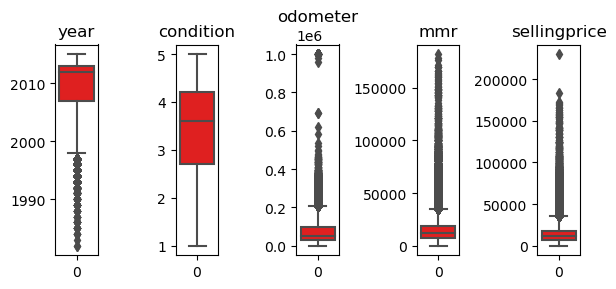

In [12]:
# Check for possible outliers.

plt.figure(figsize=(6, 3))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(dfcar[num[i]], color='red', orient='v')
    plt.title(num[i])
    plt.tight_layout()

It can be seen that `mmr` and `sellingprice` have the most outliers, as do the `odometer` and `year` columns. The quartiles and median also seem far away. This can happen because there is a lot of car data (500k++), so the MMR, selling price, and odometer values also vary greatly. The column that looks the most normal is the `condition` column. The results of this analysis are a visual form of the data statistics we carried out previously in the Data Exploration stage.

### Data Distribution (year, condition, odometer, MMR, sellingprice)

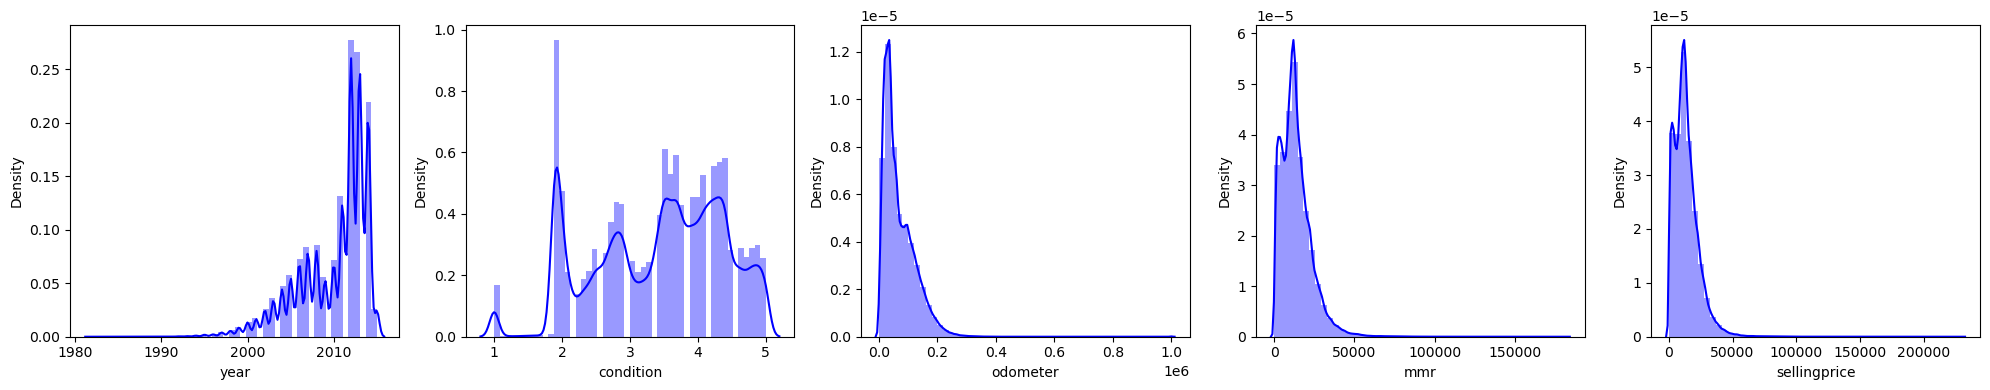

In [13]:
# Check the distribution plot

plt.figure(figsize=(20, 4))
for i in range(0, len(num)):
    plt.subplot(1, 5, i+1)
    sns.distplot(dfcar[num[i]], color='blue')
    plt.tight_layout()

From the graph above it can be seen:
1. From the `year` column we can see that sales tend to increase every year and peak sales were between 2010 and 2015. We can also see that the `year` column is left-skewed.
2. The `odometer`, `mmr`, and `sellingprice` columns are right-skewed.
3. In the `condition` column, the condition of the car in the range of 2 is the majority of the other conditions. This shows that the condition of the used car is not good. However, there are quite a few cars in the condition that are rated 3 or above to 4.
4. For the 'odometer', it can be seen that the majority are in the range of 0 to 0.2, which means the odometer ranges from 0 to 200k. Meanwhile, using cars over 200k is relatively rare.
5. The `mmr` and `selling price` columns look similar, the car prices range from 0 to 50000.

### Maximum and Minimum Value check

Like the previous analysis, where we found min and max values that seemed unreasonable, we will further check the data containing these values.

Some of these columns are `odometer`, `mmr`, and `sellingprice`.

**1. Min and max values of the Odometer columnr**

In [14]:
# Viewing data row with 'odometer' value = 1 (min)
min_odo = dfcar[dfcar['odometer'] == 1.000]
min_odo.sample(3)

year      make         model    trim       body transmission  \
23203  2005    Nissan         Quest  3.5 SE    Minivan          NaN   
24062  2004      Ford         F-150  Lariat  SuperCrew    automatic   
40391  2005  Maserati  Quattroporte    Base      Sedan    automatic   

                     vin state  condition  odometer  color interior  \
23203  5n1bv28u65n112322    nj      2.900     1.000  green     gray   
24062  1ftpw14584kd05460    tx      2.300     1.000  black    beige   
40391  zamce39a150016819    tx      2.100     1.000  black        —   

                                           seller    mmr  sellingprice  \
23203                            dch freehold llc   4625          2800   
24062                          auto max sales inc  12050          4300   
40391  remarketing by ge/manheim dallas ft. worth   6200          1200   

                                      saledate  
23203  Wed Dec 31 2014 09:30:00 GMT-0800 (PST)  
24062  Wed Dec 31 2014 10:20:00 GMT-0800 (PST)  
40391  Tue Jun 23 2015 04:00:00 GMT-0700 (PDT)

In [15]:
# Viewing data row with 'odometer' value = 999999 (max)
max_odo = dfcar[dfcar['odometer'] == 999999.000]
max_odo.sample(3)

year   make       model trim   body transmission                vin  \
338793  2011   Ford       Focus   SE  Sedan    automatic  1fahp3fn1bw174703   
476582  2007  Buick  Rendezvous   CX    suv    automatic  3g5da03lx7s587886   
260729  2003    NaN         NaN  NaN    NaN    automatic  3gkfk16t03g190351   

       state  condition   odometer   color interior  \
338793    fl      2.000 999999.000  silver    black   
476582    oh      2.000 999999.000   white     gray   
260729    oh      2.000 999999.000   white     gray   

                                              seller   mmr  sellingprice  \
338793  regional acceptance corporation / greenville  3600           700   
476582                            santander consumer  1750          2250   
260729         credit acceptance corp/vrs/southfield   625          2000   

                                       saledate  
338793  Mon Feb 23 2015 01:30:00 GMT-0800 (PST)  
476582  Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)  
260729  Thu Feb 19 2015 01:00:00 GMT-0800 (PST)

From the min and max data in the `odometer` column above, it can be seen that the data not only contains min and max values that are far away, but other columns are also abnormal. This can be seen from the sample above, where the min and max rows contain many null values, low MMR and selling price values, and poor conditions.

**2. Min sellingprice Value**

In [16]:
# Viewing data row with 'sellingprice' value = 1 (min)
min_price = dfcar[dfcar['sellingprice'] == 1.000]
min_price

year           make             model   trim          body  \
7566    2002           Ford  F-350 Super Duty    XLT      Crew Cab   
48453   2003  Mercedes-Benz           E-Class   E500         Sedan   
293223  2014           Ford      E-Series Van  E-250  E-Series Van   
348252  1995          Isuzu             Rodeo     LS           SUV   

       transmission                vin state  condition   odometer  color  \
7566            NaN  1ftsw31f52ed16477    ca      2.000        NaN  white   
48453     automatic  wdbuf70j73a269529    ga      2.100      1.000  black   
293223    automatic  1ftne2ew6eda13643    tx      4.100  31886.000  white   
348252          NaN  4s2cm58v9s4375559    va      1.000 254132.000    red   

       interior                      seller    mmr  sellingprice  \
7566       gray                 laa leasing   7850             1   
48453     black  peoples credit company inc   7325             1   
293223     gray                      u-haul  20800             1   
348252     gray  automotive remarketing inc    375             1   

                                       saledate  
7566    Thu Feb 05 2015 04:00:00 GMT-0800 (PST)  
48453   Tue Jan 06 2015 09:30:00 GMT-0800 (PST)  
293223  Thu Feb 12 2015 03:00:00 GMT-0800 (PST)  
348252  Wed Mar 04 2015 01:05:00 GMT-0800 (PST)

**3. Minimum MMR Value**

In [17]:
# Viewing data row with 'mmr' value = 25 (min)
min_mmr = dfcar[dfcar['mmr'] == 25.000]
min_mmr.sample(3)

year       make           model trim         body transmission  \
440127  2000     Nissan          Maxima   SE        Sedan    automatic   
196104  2004       Ford  F-150 Heritage   XL  Regular Cab          NaN   
28688   2000  Chevrolet           Tahoe   LS          SUV    automatic   

                      vin state  condition   odometer  color interior  \
440127  jn1ca31d8yt763569    fl      1.900 229381.000  black     gray   
196104  2ftrf17224ca37472    nc      3.000 265521.000  white     gray   
28688   1gnec13t4yj164096    sc        NaN 347449.000  white     gray   

                                     seller  mmr  sellingprice  \
440127             courtesy nissan of tampa   25           300   
196104  crossroads ford of kernersville inc   25          1300   
28688                five star florence llc   25           900   

                                       saledate  
440127  Thu May 21 2015 09:20:00 GMT-0700 (PDT)  
196104  Mon Jan 26 2015 01:00:00 GMT-0800 (PST)  
28688   Thu Dec 18 2014 10:00:00 GMT-0800 (PST)

From the data above, there is a value of `mmr`, which is only 25. There are also irregularities in other columns, including many null values, the value of `sellingprice`, which is relatively small, and `condition`, which is considered not good. This data will be handled later in the data cleansing stage.

### Data Insight
Some other insights obtained from univariate analysis

In [18]:
# Grouping by 'make' (brand or brands)
top_make = dfcar.groupby('make').size().sort_values(ascending= False).reset_index(name='count')
top_make

make  count
0         Ford  93554
1    Chevrolet  60197
2       Nissan  53946
3       Toyota  39871
4        Dodge  30710
..         ...    ...
91  chev truck      1
92     ford tk      1
93   airstream      1
94  hyundai tk      1
95    mazda tk      1

[96 rows x 2 columns]

It can be seen that the most favorite car brand is Ford, followed by Chevrolet, Nissan, Toyota, Dodge, etc. What needs to be paid attention to is that the difference between the top n and bottom n cars is very large, where the top n reaches tens of thousands while the bottom n is only 1 car.

In [19]:
# Grouping by 'model'
top_model = dfcar.groupby('model').size().sort_values(ascending= False).reset_index(name='count')
top_model

model  count
0     Altima  19349
1      F-150  14479
2     Fusion  12946
3      Camry  12545
4     Escape  11861
..       ...    ...
968    Paseo      1
969       Q3      1
970  Ram Van      1
971  Regency      1
972        1      1

[973 rows x 2 columns]

It can be seen that the top used car model is the Altima, and the top 2 is the F-150. This is also the same as the previous car brand analysis, where the difference between the top n and bottom n is very large.

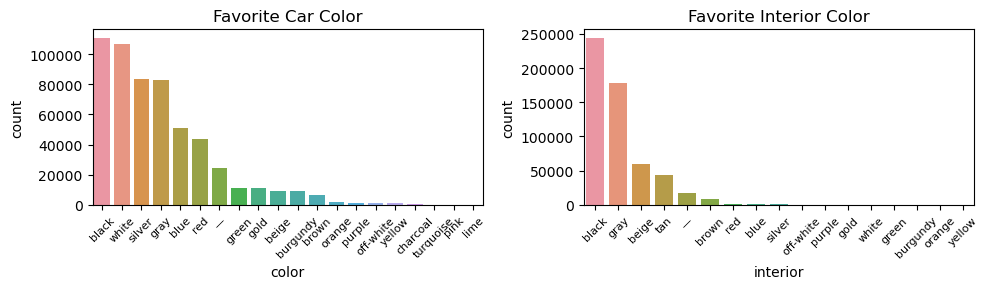

In [20]:
# Grouping by car color and interior color
color = dfcar.groupby('color').size().sort_values(ascending= False).reset_index(name= 'count')
interior = dfcar.groupby('interior').size().sort_values(ascending= False).reset_index(name= 'count')

# Favorite color visualization
plt.figure(figsize= (10, 3))

plt.subplot(1,2,1)
sns.barplot(data=color, x='color', y='count')
plt.title('Favorite Car Color')
plt.xticks(rotation= 45, size= 8)

plt.subplot(1,2,2)
sns.barplot(data=interior, x='interior', y='count')
plt.title('Favorite Interior Color')
plt.xticks(rotation= 45, size= 8)
plt.tight_layout()

It can be seen that:
1. The most preferred car color and car interior color is black.
2. Commonly used car interior colors are black, grey, beige and tan.
3. There is a wrong value ( - ) in the color and interior of the car, so it needs to be handled at the next stage.

## MULTIVARIATE ANALYSIS

### analyzing the Correlation Between Numerical Features

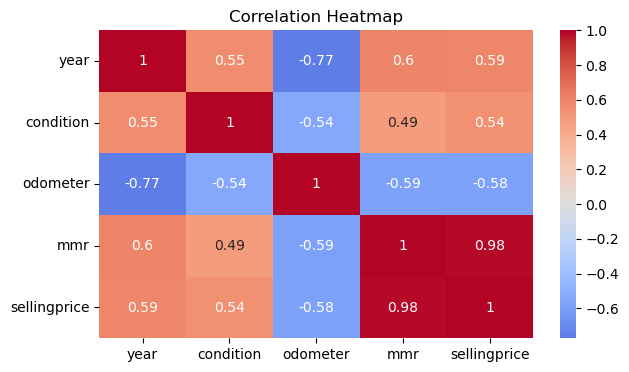

In [21]:
# Heatmap correlation plot
corr_matrix = dfcar.corr()
plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

1. The correlation between `year` and `sellingprice` is positive, indicating that the newer the car, the higher the selling price.

2. The `condition` column has a positive correlation with `sellingprice`, which means the better the condition of the car, the higher the selling price.

3. The `odometer` column has a negative correlation with `sellingprice`, indicating that the less mileage, the higher the selling price.

4. The `mmr` column has a fairly strong positive correlation with `sellingprice`, indicating that the selling price predicted by MMR has a good correlation with the actual selling price.

5. The `Year` and `Odometer` columns also show a fairly high negative correlation, meaning that the latest cars have odometers that tend to be lower.

### Correlation of MMR and Selling Price

As the results of the previous analysis show that the MMR and Selling Price values are highly similar, we will try to visualize the relationship between the two.

from plotnine import *

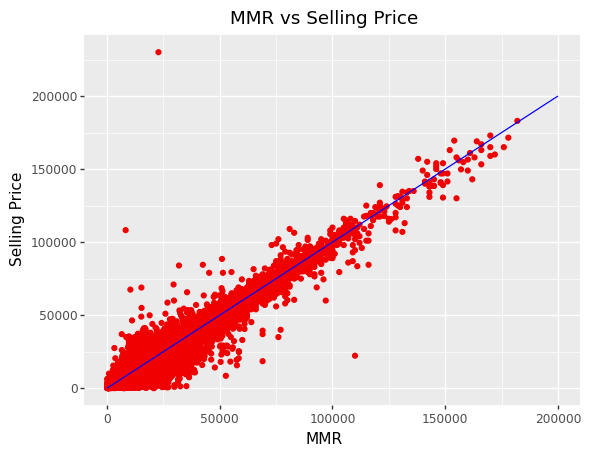

<ggplot: (132027059496)>

In [22]:
from plotnine import *

# MMR and Selling Price Visualization
(ggplot(dfcar)
 + aes(x ='mmr', y ='sellingprice')
 + geom_point(color='#f00000')
 + labs(title='MMR vs Selling Price', x='MMR', y='Selling Price')
 + annotate(geom = "segment", x = 0, xend = 200000, y = 0, yend = 200000, color='blue')
)

The graph above shows how the selling price is distributed against MMR.
MMR is an abbreviation for Manheim Market Report, which is a specific report which is an indicator of wholesale prices for vehicle sales. Price calculations are based on more than 10 million sales transactions over the previous 13 months at prices correct by real vehicle sales at Manheim auction houses.
So, it can be said that MMR is worthy of being used as a price reference.

### Correlation between Condition and MMR Based on Year

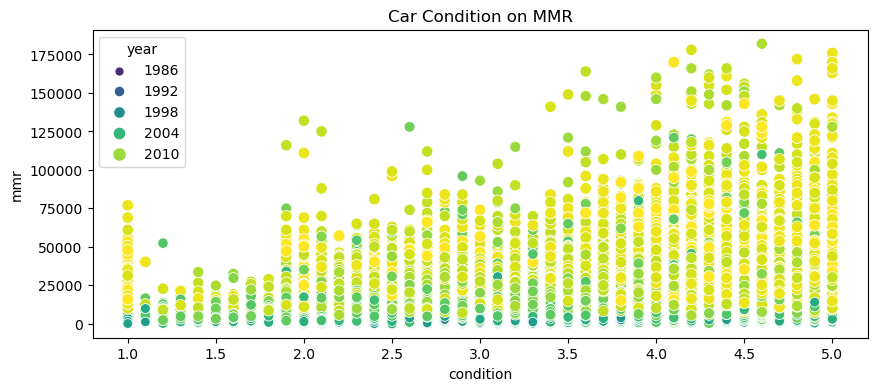

In [23]:
# Visualization of the correlation between selling price and car condition
plt.figure(figsize=(10, 4))
scatter = sns.scatterplot(data=dfcar, x='condition', y='mmr', hue='year', size= 'year', palette='viridis')
plt.title('Car Condition on MMR')
plt.show()

From the graph above, it can be concluded that in every range of car conditions with a relatively low MMR, there are cars from 2004 and above. 
This could indicate that many 2004 cars are being sold second-hand.
Apart from that, car production since 2010 has increased in condition, and the MMR has also become higher. This shows that MMR has a strong influence on the good condition and year of production of the car.

----------

# BUSINESS INSIGHT AND VISUALIZATION

In this section, we try to explore business insights and visualize them. We will use the copy dataset as a differentiator in the modeling process. Some of the business insights that we try to explore are: <br>
**1. What is the sales percentage?**  
As in the analysis at the start of the project, we said that in simple calculations, there were around 51% of cars sold at prices below MMR, where MMR is the reference price in the world of used car sales. Next, we will try to do the calculation again.

**2. Average Sales in Monthly and Daily Periods**  
Furthermore, we looked at the average sales in monthly and daily periods when viewed from the MMR price reference. This aims to find out when sales occur below or above the MMR price.

**3. Number of Monthly, Daily and Hourly Transactions**  
This number of transactions is used to find out how customer behavior is based on when they bought the car. We can also know when to take advantage of the momentum to make promotions or improve sales strategies.

**4. Top Car Brands**  
Displays the most sold car brands during the 2015 period.

## 1. The sales percentag
First, we will use dataset copy to separate insight exploration and modelling. Next, we separate the `saledate` feature into several specific times, then categorize several values into categorical features to simplify the calculation process.

In [24]:
# Copying dataset
copy = dfcar.copy()

# 'is_sold_below_mmr' contains information about whether the car was sold below MMR or not (1=Yes, 0=No)
copy['is_sold_below_mmr'] = copy.apply(lambda x: 1 if x.sellingprice < x.mmr else 0, axis=1)

# Calculate sales percentage
transaction = copy.groupby('is_sold_below_mmr').agg({'vin':'count'}).rename({'vin':'total_transaction'}, axis=1)
transaction['percentage'] = round(((transaction/transaction.sum())*100), 2)
transaction

total_transaction  percentage
is_sold_below_mmr                               
0                             272386      48.740
1                             286425      51.260

In [25]:
copy.head(3)

year make     model        trim   body transmission                vin  \
0  2015  Kia   Sorento          LX    SUV    automatic  5xyktca69fg566472   
1  2015  Kia   Sorento          LX    SUV    automatic  5xyktca69fg561319   
2  2014  BMW  3 Series  328i SULEV  Sedan    automatic  wba3c1c51ek116351   

  state  condition  odometer  color interior  \
0    ca      5.000 16639.000  white    black   
1    ca      5.000  9393.000  white    beige   
2    ca      4.500  1331.000   gray    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america, inc  20500         21500   
1                 kia motors america, inc  20800         21500   
2  financial services remarketing (lease)  31900         30000   

                                  saledate  is_sold_below_mmr  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)                  0  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)                  0  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)                  1

## 2. Average Sales to MMR

In [26]:
# Change the object data type to DateTime
timeget = []
for i in copy['saledate'].str.split():
    time_split = i[:5]
    date_string = ' '.join(time_split)
    timeget.append(date_string)
copy['datetime'] =  pd.to_datetime(timeget)

In [27]:
# Change the object data type to DateTime
copy['datetime'] =  pd.to_datetime(timeget)

# Creating a new feature from the 'datetime' column
copy['hour'] = copy['datetime'].apply(lambda time: time.strftime('%H:%M:%S'))
copy['month'] = copy['datetime'].apply(lambda time: time.month)
copy['day of week'] = copy['datetime'].apply(lambda time: time.dayofweek)

In [28]:
# Mapping spesific day of week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
copy['day of week'] = copy['day of week'].map(dmap)
copy.head()

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  ... interior  \
0  5xyktca69fg566472    ca      5.000 16639.000  ...    black   
1  5xyktca69fg561319    ca      5.000  9393.000  ...    beige   
2  wba3c1c51ek116351    ca      4.500  1331.000  ...    black   
3  yv1612tb4f1310987    ca      4.100 14282.000  ...    black   
4  wba6b2c57ed129731    ca      4.300  2641.000  ...    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america, inc  20500         21500   
1                 kia motors america, inc  20800         21500   
2  financial services remarketing (lease)  31900         30000   
3                 volvo na rep/world omni  27500         27750   
4  financial services remarketing (lease)  66000         67000   

                                  saledate is_sold_below_mmr  \
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)                 0   
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)                 0   
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)                 1   
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)                 0   
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)                 0   

             datetime      hour month  day of week  
0 2014-12-16 12:30:00  12:30:00    12          Tue  
1 2014-12-16 12:30:00  12:30:00    12          Tue  
2 2015-01-15 04:30:00  04:30:00     1          Thu  
3 2015-01-29 04:30:00  04:30:00     1          Thu  
4 2014-12-18 12:30:00  12:30:00    12          Thu  

[5 rows x 21 columns]

In [29]:
# Creation of several columns related to time:
## The 'hour_only' column is a special column that only displays hours (column 'hour' has the value hours:minutes:seconds)
copy['hour_only'] = copy['datetime'].dt.hour

## Create a 'month_year' column, a special column that only displays the month and date (the 'datetime' column has the value of date and time)
copy['month_year'] = copy.datetime.dt.strftime('%b-%y')

## Create a 'date' column that has a year-month-date format
copy['date'] = copy['datetime'].dt.date
copy['date'] = pd.to_datetime(copy['date'], format = '%Y-%m-%d')

### Monthly

We will see how average sales compare to MMR in a monthly period. The data presented is only a sample of the existing period. Here, we take each quarter from 2014-2015, where from the previous EDA results, it can be seen that a lot of sales occurred in those years.

In [30]:
# Perform grouping based on the 'month year' column
monthly_sale_summary = copy.groupby(['month_year']).agg({'vin' : 'count', 'mmr' : ['sum', 'mean'], 'sellingprice' : ['sum', 'mean'] }).reset_index()
monthly_sale_summary.columns = ['date', 'total_transaction', 'mmr_sum', 'mmr_avg', 'selling_sum', 'selling_avg']

# Sorting Date manually
custom_dict = {'Jan-14':0, 'Feb-14':1, 'Dec-14':2, 'Jan-15':3, 'Feb-15':4, 'Mar-15':5, 'Apr-15':6, 'May-15':7, 'Jun-15':8, 'Jul-15':9}
monthly_sale_summary = monthly_sale_summary.sort_values(by=['date'], key=lambda x: x.map(custom_dict))

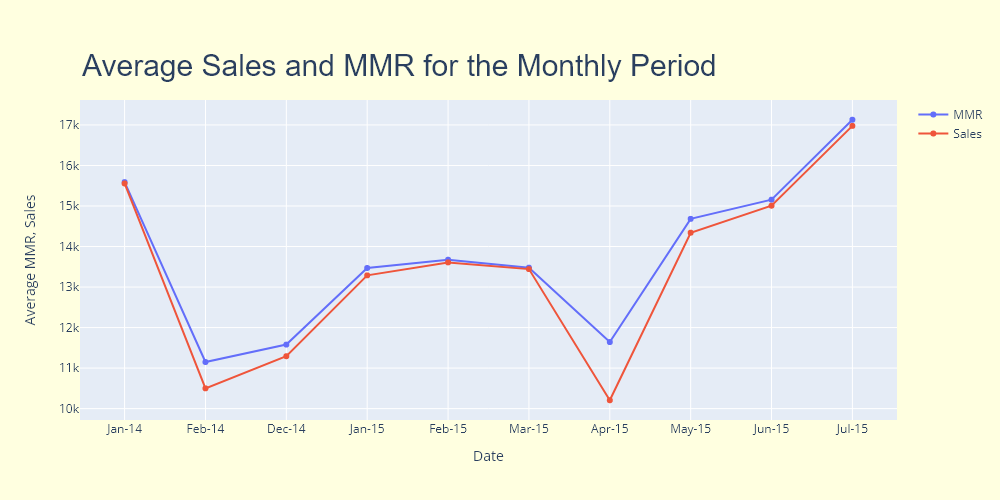

In [31]:
# Visualization of Average Sales and MMR for the Monthly Period
fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly_sale_summary.date, y=monthly_sale_summary.mmr_avg,name='MMR'))
fig.add_trace(go.Scatter(x=monthly_sale_summary.date, y=monthly_sale_summary.selling_avg, name='Sales'))

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom', text='Average Sales and MMR for the Monthly Period', font=dict(family='Arial', size=30), showarrow=False))
fig.update_layout(autosize=False, width=1000, height=500, paper_bgcolor="LightYellow", annotations=annotations)

fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Average MMR, Sales")

fig.show('png')

The average number of sales each month is always lower than the MMR value.

### Daily

In [32]:
# Perform grouping based on the 'date' column
daily_sale_summary = copy.groupby('date').agg({'vin' : 'count', 'mmr' : ['sum', 'mean'], 'sellingprice' : ['sum', 'mean'] }).reset_index()
daily_sale_summary.columns = ['date', 'total_transaction', 'mmr_sum', 'mmr_avg', 'selling_sum', 'selling_avg']

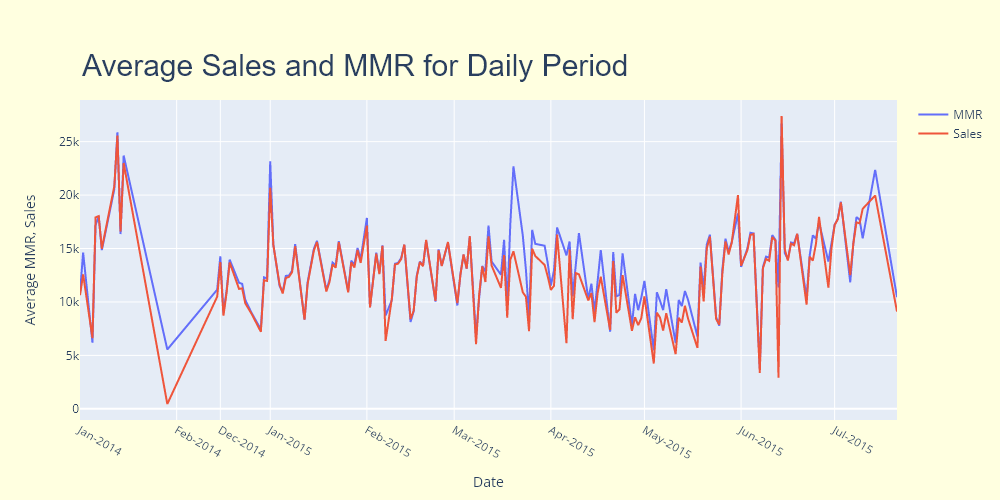

In [33]:
# Visualization of Average Sales and MMR for Daily Period
dt_breaks = pd.date_range(start='2014-02-15', end='2014-12-15', freq='D')
fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_sale_summary.date,y =daily_sale_summary.mmr_avg, name='MMR'))

fig.add_trace(go.Scatter(x=daily_sale_summary.date, y=daily_sale_summary.selling_avg, name='Sales'))
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom', text='Average Sales and MMR for Daily Period', font=dict(family='Arial', size=30), showarrow=False))
fig.update_layout(autosize=False, width=1000, height=500, paper_bgcolor="LightYellow", annotations=annotations)

# Set axis title
fig.update_xaxes(title_text="Date", rangebreaks=[dict(values=dt_breaks)], tickformat = '%b-%Y', dtick='M1')
fig.update_yaxes(title_text="Average MMR, Sales")

fig.show('png')

From the daily plot above, it can be seen that there are several points where car sales are the same or even higher than MMR compared to when seen from the monthly plot.

## 3. Total Transaction

### Monthly Total Transaction

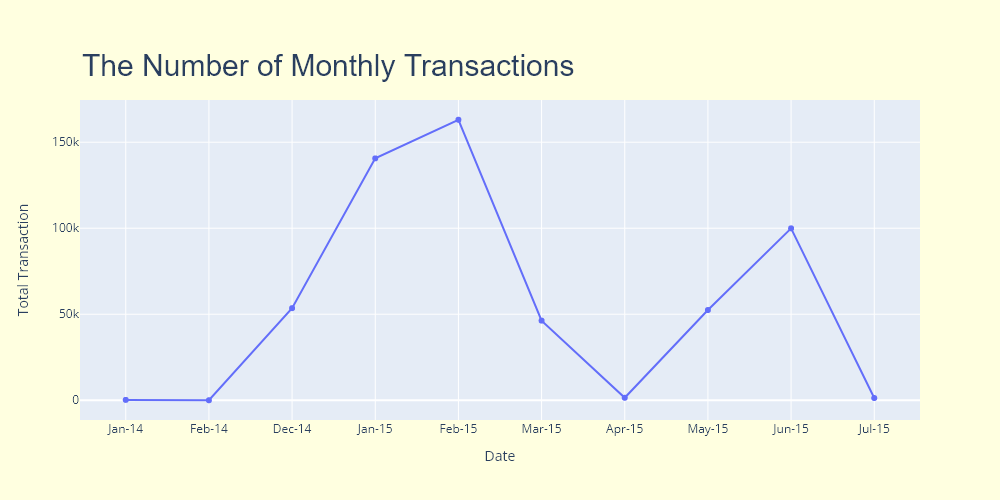

In [34]:
# Visualization of the Number of Monthly Transactions
fig = go.Figure()
fig.add_trace(go.Scatter(x=monthly_sale_summary.date, y=monthly_sale_summary.total_transaction, name='MMR'))
annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05, xanchor='left', yanchor='bottom', text='The Number of Monthly Transactions', font=dict(family='Arial', size=30), showarrow=False))
fig.update_layout(autosize=False, width=1000, height=500, paper_bgcolor="LightYellow", annotations=annotations)

# Set axis title
fig.update_xaxes(title_text="Date")
fig.update_yaxes(title_text="Total Transaction")

fig.show('png')

The peak of transactions occurred in Feb-2015 (around 160 thousand transactions), after which there was a decline in transactions until April-2015 and then increased again until June-2015.

## 4. Top Car Brand

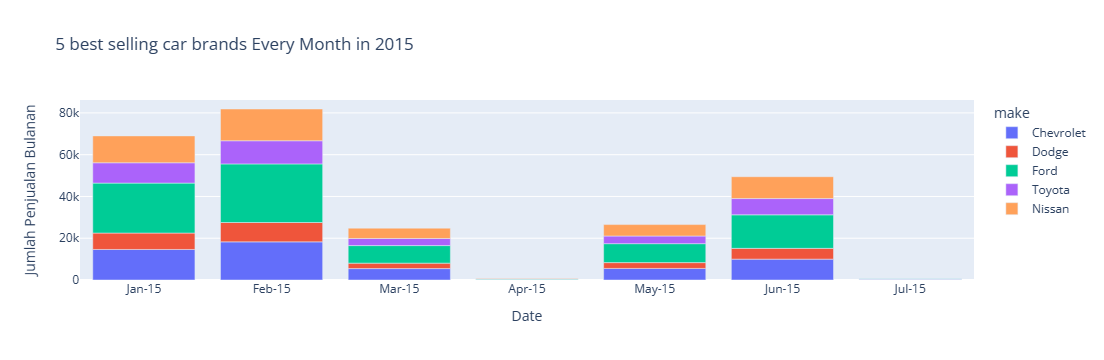

In [35]:
import plotly.express as px

# Do grouping based on the 'month year' column and car brand, and calculate the number
monthly_brand_summary = copy.groupby(['month_year', 'make']).size().reset_index(name='count')

# Sort by month and year (month_year) and quantity sold (count) in descending order
monthly_brand_summary = monthly_brand_summary.sort_values(by=['month_year', 'count'], ascending=[True, False])

# Taking the top 10 car brands every month
top_5_brands_per_month = monthly_brand_summary.groupby('month_year').head(5)

# Filter for 2015 only
monthly_brand_summary_2015 = top_5_brands_per_month[top_5_brands_per_month['month_year'].str.contains('15')]

# Change the data type of the 'month_year' column to the category data type in the desired order.
month_order = ['Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15']
monthly_brand_summary_2015['month_year'] = pd.Categorical(monthly_brand_summary_2015['month_year'], categories=month_order, ordered=True)

# Sort results by desired month
monthly_brand_summary_2015 = monthly_brand_summary_2015.sort_values(by=['month_year'])

# Barplot visualization of the number of monthly sales by using the car brand as the hue and only for the 2015 period
fig = px.bar(monthly_brand_summary_2015, x='month_year', y='count', color='make',
             labels={'month_year': 'Date', 'count': 'Total Monthly Sales'},
             title='5 best selling car brands Every Month in 2015')

fig.update_xaxes(title='Date')
fig.update_yaxes(title='Jumlah Penjualan Bulanan')

# Set showlegend to False to only show legends for 5 brands
for trace in fig.data:
    if trace.name not in monthly_brand_summary_2015['make'].head(5).unique():
        trace.showlegend = False

fig.show()


Some information obtained from the Bar Plot above is:
1. February has the most sales compared to other months.
2. Ford is the brand that sells the most, especially in January and February 2015. This shows that Ford has a strong market share.
3. April and July were the months with the lowest sales compared to other months in 2015.

# Data Preparation

----

## Data Cleansing

### Dropping

**Duplicated Rows**

In the previous Data Exploration stage, it was seen that there were no duplicate rows, so no handling was needed.

**Rows with Extreme Values**

In the previous EDA stage, we found rows that had extreme outliers and did not make sense. So, at this stage, we will delete these rows.

In [36]:
dfcar2 = dfcar.copy()

In [37]:
# Drop min. odometer values
i_min_odo = dfcar2[((dfcar2.odometer == 1.000))].index
dfcar2 = dfcar2.drop(i_min_odo)

In [38]:
# Drop max. odometer values
i_max_odo = dfcar2[((dfcar2.odometer == 999999.000))].index
dfcar2 = dfcar2.drop(i_max_odo)

In [39]:
# Drop min. sellingprice values
i_min_price = dfcar2[((dfcar2.sellingprice == 1.000))].index
dfcar2 = dfcar2.drop(i_min_price)

In [40]:
# Drop min. mmr values
i_min_mmr = dfcar2[((dfcar2.mmr == 25.000))].index
dfcar2 = dfcar2.drop(i_min_mmr)

In [41]:
dfcar2.shape

(557391, 16)

**Irrelevant Features**

Some features seem less relevant, and there is too much unique value. So, it is assumed that these features do not have a particular pattern. These features are `vin`, `sellingprice`, and `saledate` which will later be removed. Some of the reasons are:  
a. `vin` is not a feature that determines the price of a car because it only functions as an identification number for the car. <br>
b. `selling price` has a high correlation (0.98) with `mmr` (target feature). <br>
c. `saledate` does not show any significant factor because the time is too broad and uncertain, so there is no special pattern that influences the selling price of a car.

In [42]:
# Remove less relevant features.
dfcar2 = dfcar2.drop(['vin','sellingprice','saledate'], axis=1)
dfcar2.head(3)

year make     model        trim   body transmission state  condition  \
0  2015  Kia   Sorento          LX    SUV    automatic    ca      5.000   
1  2015  Kia   Sorento          LX    SUV    automatic    ca      5.000   
2  2014  BMW  3 Series  328i SULEV  Sedan    automatic    ca      4.500   

   odometer  color interior                                  seller    mmr  
0 16639.000  white    black                 kia motors america, inc  20500  
1  9393.000  white    beige                 kia motors america, inc  20800  
2  1331.000   gray    black  financial services remarketing (lease)  31900

### Handle Unique Values

As discussed previously, there is a lot of unique value in some features. We will handle non-uniform unique values as:
1. All categorical data except `saledate` will be changed to lowercase to get the same value. 
2. The " — " values in the `color` and `interior` features will be changed to 'black' as the mode value.

In [43]:
# Function to change column names to lowercase
def content_consistent(df):
    cols = df.select_dtypes(object).columns.difference(['saledate'])
    df[cols] = df[cols].apply(lambda x: x.str.lower())
    return df

dfcar2 = content_consistent(dfcar2)

In [44]:
import re

# Replace color and interior
dfcar2['color'].replace('—','black',inplace=True)
dfcar2['interior'].replace('—','black',inplace=True)

# Replace model and trim by removing special characters
dfcar2['model'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)
dfcar2['trim'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)
dfcar2['seller'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)

# replace values that have the same meaning
dfcar2['make'].replace('landrover','land rover',inplace=True)
dfcar2['make'].replace('mercedes-b','mercedes-benz',inplace=True)
dfcar2['make'].replace('mercedes','mercedes-benz',inplace=True)
dfcar2['make'].replace('vw','volkswagen',inplace=True)
dfcar2['make'].replace('ford tk','ford truck',inplace=True)
dfcar2['body'].replace('koup','coupe',inplace=True)
dfcar2['body'].replace('regular-cab','regular cab',inplace=True)
dfcar2['body'].replace('xtracab','extended cab',inplace=True)

In [45]:
# View the results of handling inconsistent values and columns
c = ['make', 'model', 'trim', 'body', 'color', 'interior', 'state', 'seller']

dfcar2[c].describe()

make   model    trim    body   color interior   state  \
count   547162  547064  546817  544286  556662   556662  557391   
unique      61     841    1883      42      19       16      38   
top       ford  altima    base   sedan   black    black      fl   
freq     93834   19322   55641  240696  135399   260895   82780   

                   seller  
count              557391  
unique              14152  
top     nissaninfiniti lt  
freq                19691

After cleaning the data by generalizing the string writing, the results are visible:
a. `make` which was originally 96 now only has 61 unique values <br>
b. `model` which was originally 973 now only has 841 unique values <br>
c. `trim` which was originally 1975 now only has 1883 unique values <br>
d. `body` which was originally 86 now only has 42 unique values <br>
e. `seller` which was originally 14264 now only has 14152 unique values <br>
f. `color` and `interior` are reduced by 1 value from the previous unique value because they have been replaced by the mode value (black). <br>
g. `state` is the only one that still has the same value.

### Handle Missing Values

There are 9 features that have a Null value, including: `make`, `model`, `trim`, `body`, `transmission`, `condition`, `odometer`, `color`, `interior`.

However, because the color and interior features have been removed, we only need to handle the remaining 7 features.
1. All categorical data will be filled with mode values.
2. `condition`, which has a fairly normal distribution of data, will be filled with the mean value.
3. `odometer` only has 94 null values so we will delete it.

In [46]:
# replace null values with mode values
mode_value = dfcar2.filter(['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']).mode()
cols = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']

dfcar2[cols] = dfcar2[cols].fillna(dfcar2.mode().iloc[0])

In [47]:
# replace null values with mean values
dfcar2['condition'] = dfcar2['condition'].fillna(dfcar2['condition'].mean())

In [48]:
# delete Null
dfcar2.dropna(axis=0, inplace=True)
dfcar2.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
dtype: int64

### Handle Outliers

In [49]:
df_clean = dfcar2.copy()

In [50]:
# Function to check for outliers
def outlier_del(df, column, mode):
    q1 = df.iloc[:,column].quantile(0.25)
    q3 = df.iloc[:,column].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - (1.5 * iqr)
    upper_tail = q3 + (1.5 * iqr)
    nama_kolom = df.columns[column]
    jumlah_outliers = df[(df.iloc[:,column] <= lower_tail)|(df.iloc[:,column] >= upper_tail)].iloc[:,column].count()
    total_row = df.iloc[:,column].count()
    persentase_outliers = round(((jumlah_outliers/total_row)*100),2)
    if mode == 'summary':
        return print('Total Outliers from ', nama_kolom, ' column :', jumlah_outliers, ' and the percentage of the outliers:', persentase_outliers, '%')
    elif mode == 'df':
        return df[(df.iloc[:,column] >= lower_tail)&(df.iloc[:,column] <= upper_tail)]
    else :
        return print('please check the inserted mode')

In [51]:
# Outliers Checking for selected Column
column = [0, 7, 8, 12]

for i in range(0, len(column)):
    outlier_del(df_clean, column[i], 'summary')

Total Outliers from  year  column : 6025  and the percentage of the outliers: 1.08 %
Total Outliers from  condition  column : 0  and the percentage of the outliers: 0.0 %
Total Outliers from  odometer  column : 10270  and the percentage of the outliers: 1.84 %
Total Outliers from  mmr  column : 16307  and the percentage of the outliers: 2.93 %


In [52]:
# Delete outliers
df_clean = df_clean[df_clean.index.isin(outlier_del(dfcar2, 0, 'df').reset_index()['index'])]
df_clean = df_clean[df_clean.index.isin(outlier_del(dfcar2, 8, 'df').reset_index()['index'])]
df_clean = df_clean[df_clean.index.isin(outlier_del(dfcar2, 12, 'df').reset_index()['index'])]
df_clean.shape

(527806, 13)

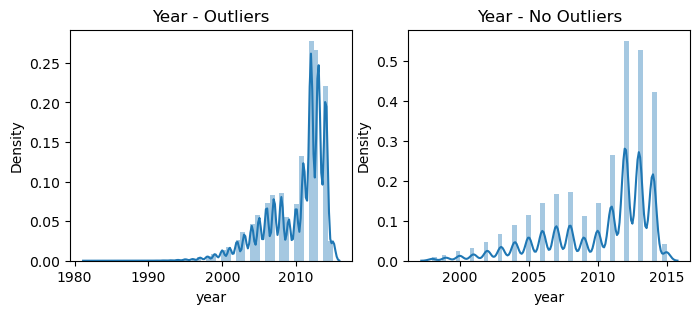

In [53]:
# Create a plot to compare conditions before and after removing outliers.
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.distplot(dfcar2.year)
plt.title('Year - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_clean.year)
plt.title('Year - No Outliers')
plt.show()

In [54]:
# Measuring skewness before handling outliers
print(f"Skewness Coefficient Before outlier removal (year) : {round(dfcar2.year.skew(), 3)}")

# Measuring skewness after handling outliers
print(f"KSkewness Coefficient After outlier removal (year) : {round(df_clean.year.skew(), 3)}")

Skewness Coefficient Before outlier removal (year) : -1.186
KSkewness Coefficient After outlier removal (year) : -1.017


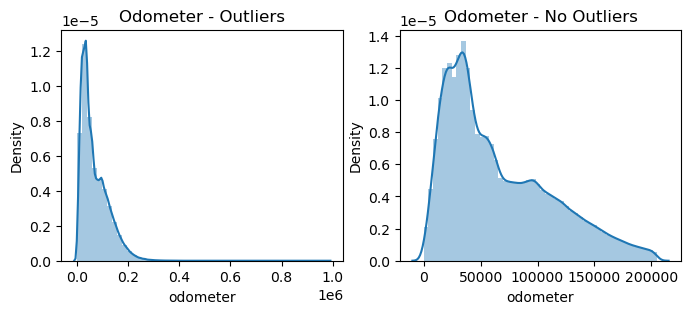

In [55]:
# Create a plot to compare conditions before and after removing outliers.
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.distplot(dfcar2.odometer)
plt.title('Odometer - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_clean.odometer)
plt.title('Odometer - No Outliers')
plt.show()

In [56]:
# Measuring skewness before handling outliers
print(f"Skewness Coefficient Before outlier removal (odometer) : {round(dfcar2.odometer.skew(), 3)}")

# Measuring skewness after handling outliers
print(f"Skewness Coefficient After outlier removal (odometer) : {round(df_clean.odometer.skew(), 3)}")

Skewness Coefficient Before outlier removal (odometer) : 1.236
Skewness Coefficient After outlier removal (odometer) : 0.841


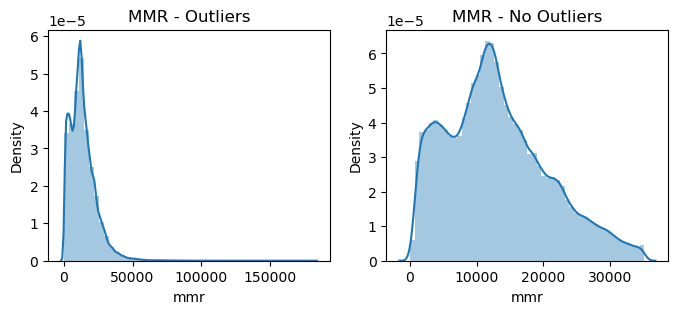

In [57]:
# Create a plot to compare conditions before and after removing outliers.
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.distplot(dfcar2.mmr)
plt.title('MMR - Outliers')
plt.subplot(1, 2, 2)
sns.distplot(df_clean.mmr)
plt.title('MMR - No Outliers')
plt.show()

In [58]:
# Measuring skewness before handling outliers
print(f"Skewness Coefficient Before outlier removal (mmr) : {round(dfcar2.mmr.skew(), 3)}")

# Measuring skewness after handling outliers
print(f"Skewness Coefficient after outlier removal (mmr) : {round(df_clean.mmr.skew(), 3)}")

Skewness Coefficient Before outlier removal (mmr) : 1.998
Skewness Coefficient after outlier removal (mmr) : 0.544


## Feature Engineering

### Feature Extraction

Because the dataset contains many categorical features, we need to convert them into numerical ones. But before that, we need to carry out feature extraction to see certain patterns that can simplify the process of changing features later (feature encoding).

#### Overall
Overall condition segmentation is based on the average of `condition` and `odometer`.

In [59]:
# Grouping 'condition' and 'odometer' based on the median value
df_yearcond = df_clean.groupby(['condition', 'odometer']).agg({'mmr' : ['mean','median']})
df_yearcond.describe()

mmr           
            mean     median
count 482570.000 482570.000
mean   12912.635  12907.897
std     7472.915   7473.601
min       50.000     50.000
25%     7200.000   7200.000
50%    12150.000  12150.000
75%    17600.000  17600.000
max    35100.000  35100.000

In [60]:
# Function for segmentation of the 'overall' column
def segment(x):
    if x['odometer'] <= 7200:
        segment = 'Poor'
    elif x['odometer'] > 7200 and x['odometer'] <= 12150:
        segment = 'Fair'
    elif x['odometer'] > 12150 and x['odometer'] <= 17600:
        segment = 'Good'
    else:
        segment = 'Very Good'
    return segment

df_clean['Overall'] = df_clean.apply(lambda x: segment(x), axis=1)

#### Made In

Simplification of values in the `make` feature is done by categorizing car brands according to the country of origin of the manufacturer.

In [61]:
# Segmentation of car brands based on the company's country of origin
us_made = ['chevrolet', 'ford', 'buick', 'cadillac', 'jeep', 'dodge', 'chrysler', 'ram', 'scion', 'pontiac', 'saturn', 'mercury', 'hummer', 'gmc', 'gmc truck',
           'oldsmobile', 'ford truck', 'lincoln', 'plymouth', 'airstream']
germany_made = ['bmw', 'audi', 'mercedes-benz', 'porsche', 'smart', 'chev truck', 'volkswagen']
japan_made = ['nissan', 'acura', 'lexus', 'infiniti', 'mitsubishi', 'mazda', 'toyota', 'subaru', 'honda', 'suzuki', 'isuzu', 'mazda tk']
uk_made = ['mini', 'land rover', 'jaguar']
italy_made = ['fiat', 'maserati']
korea_made = ['kia', 'hyundai', 'hyundai tk', 'daewoo']
swedia_made = ['volvo', 'saab']

made_in = []

for maker in df_clean['make']:
    if maker in us_made:
        country = 'US'
    elif maker in germany_made:
        country = 'DEU'
    elif maker in japan_made:
        country = 'JPN'
    elif maker in uk_made:
        country = 'UK'
    elif maker in italy_made:
        country = 'ITA'
    elif maker in korea_made:
        country = 'KOR'
    else:
        country = 'SWE'

    made_in.append(country)

df_clean['made_in'] = made_in

#### Top Make
`make` segmentation is carried out based on the top 11 brands. Brands outside the top 11 brands will be grouped as 'Other'.

In [62]:
# Top brand segmentation
top_make = df_clean.groupby('make')['year'].count().reset_index().sort_values('year', ascending=False)
top_make = top_make.iloc[:11]
top_make.drop('year', axis=1, inplace=True)
top_make['top_make'] = top_make['make']
top_make

make   top_make
13       ford       ford
7   chevrolet  chevrolet
36     nissan     nissan
48     toyota     toyota
10      dodge      dodge
17      honda      honda
19    hyundai    hyundai
25        kia        kia
8    chrysler   chrysler
3         bmw        bmw
24       jeep       jeep

In [63]:
df_clean = df_clean.merge(top_make, how='left', on='make')
df_clean['top_make'].fillna('Other', inplace=True)
df_clean['top_make'].unique()

array(['kia', 'bmw', 'Other', 'nissan', 'chevrolet', 'ford', 'hyundai',
       'jeep', 'toyota', 'dodge', 'chrysler', 'honda'], dtype=object)

### Feature Selection

After all the features have become numeric, we can delete the initial category column and columns that are not needed.

In [64]:
# Removing less relevant features
df_clean = df_clean.drop(['make', 'transmission'], axis=1)
df_clean.head(3)

year     model        trim   body state  condition  odometer  color  \
0  2015   sorento          lx    suv    ca      5.000 16639.000  white   
1  2015   sorento          lx    suv    ca      5.000  9393.000  white   
2  2014  3 series  328i sulev  sedan    ca      4.500  1331.000   gray   

  interior                                seller    mmr Overall made_in  \
0    black                kia motors america inc  20500    Good     KOR   
1    beige                kia motors america inc  20800    Fair     KOR   
2    black  financial services remarketing lease  31900    Poor     DEU   

  top_make  
0      kia  
1      kia  
2      bmw

### Feature Encoding

#### One-Hot Encoding  

Perform One-Hot Encoding on features that already have a certain pattern or similarity category but are not ordinal data.

In [65]:
df_pre = df_clean.copy()

In [66]:
# Performs One-Hot Encoding because data does not have a definite order
df_pre = pd.get_dummies(df_pre, columns=['Overall', 'made_in', 'top_make'])
df_pre.head(3)

year     model        trim   body state  condition  odometer  color  \
0  2015   sorento          lx    suv    ca      5.000 16639.000  white   
1  2015   sorento          lx    suv    ca      5.000  9393.000  white   
2  2014  3 series  328i sulev  sedan    ca      4.500  1331.000   gray   

  interior                                seller  ...  top_make_chevrolet  \
0    black                kia motors america inc  ...                   0   
1    beige                kia motors america inc  ...                   0   
2    black  financial services remarketing lease  ...                   0   

   top_make_chrysler  top_make_dodge  top_make_ford  top_make_honda  \
0                  0               0              0               0   
1                  0               0              0               0   
2                  0               0              0               0   

   top_make_hyundai  top_make_jeep  top_make_kia  top_make_nissan  \
0                 0              0             1                0   
1                 0              0             1                0   
2                 0              0             0                0   

   top_make_toyota  
0                0  
1                0  
2                0  

[3 rows x 34 columns]

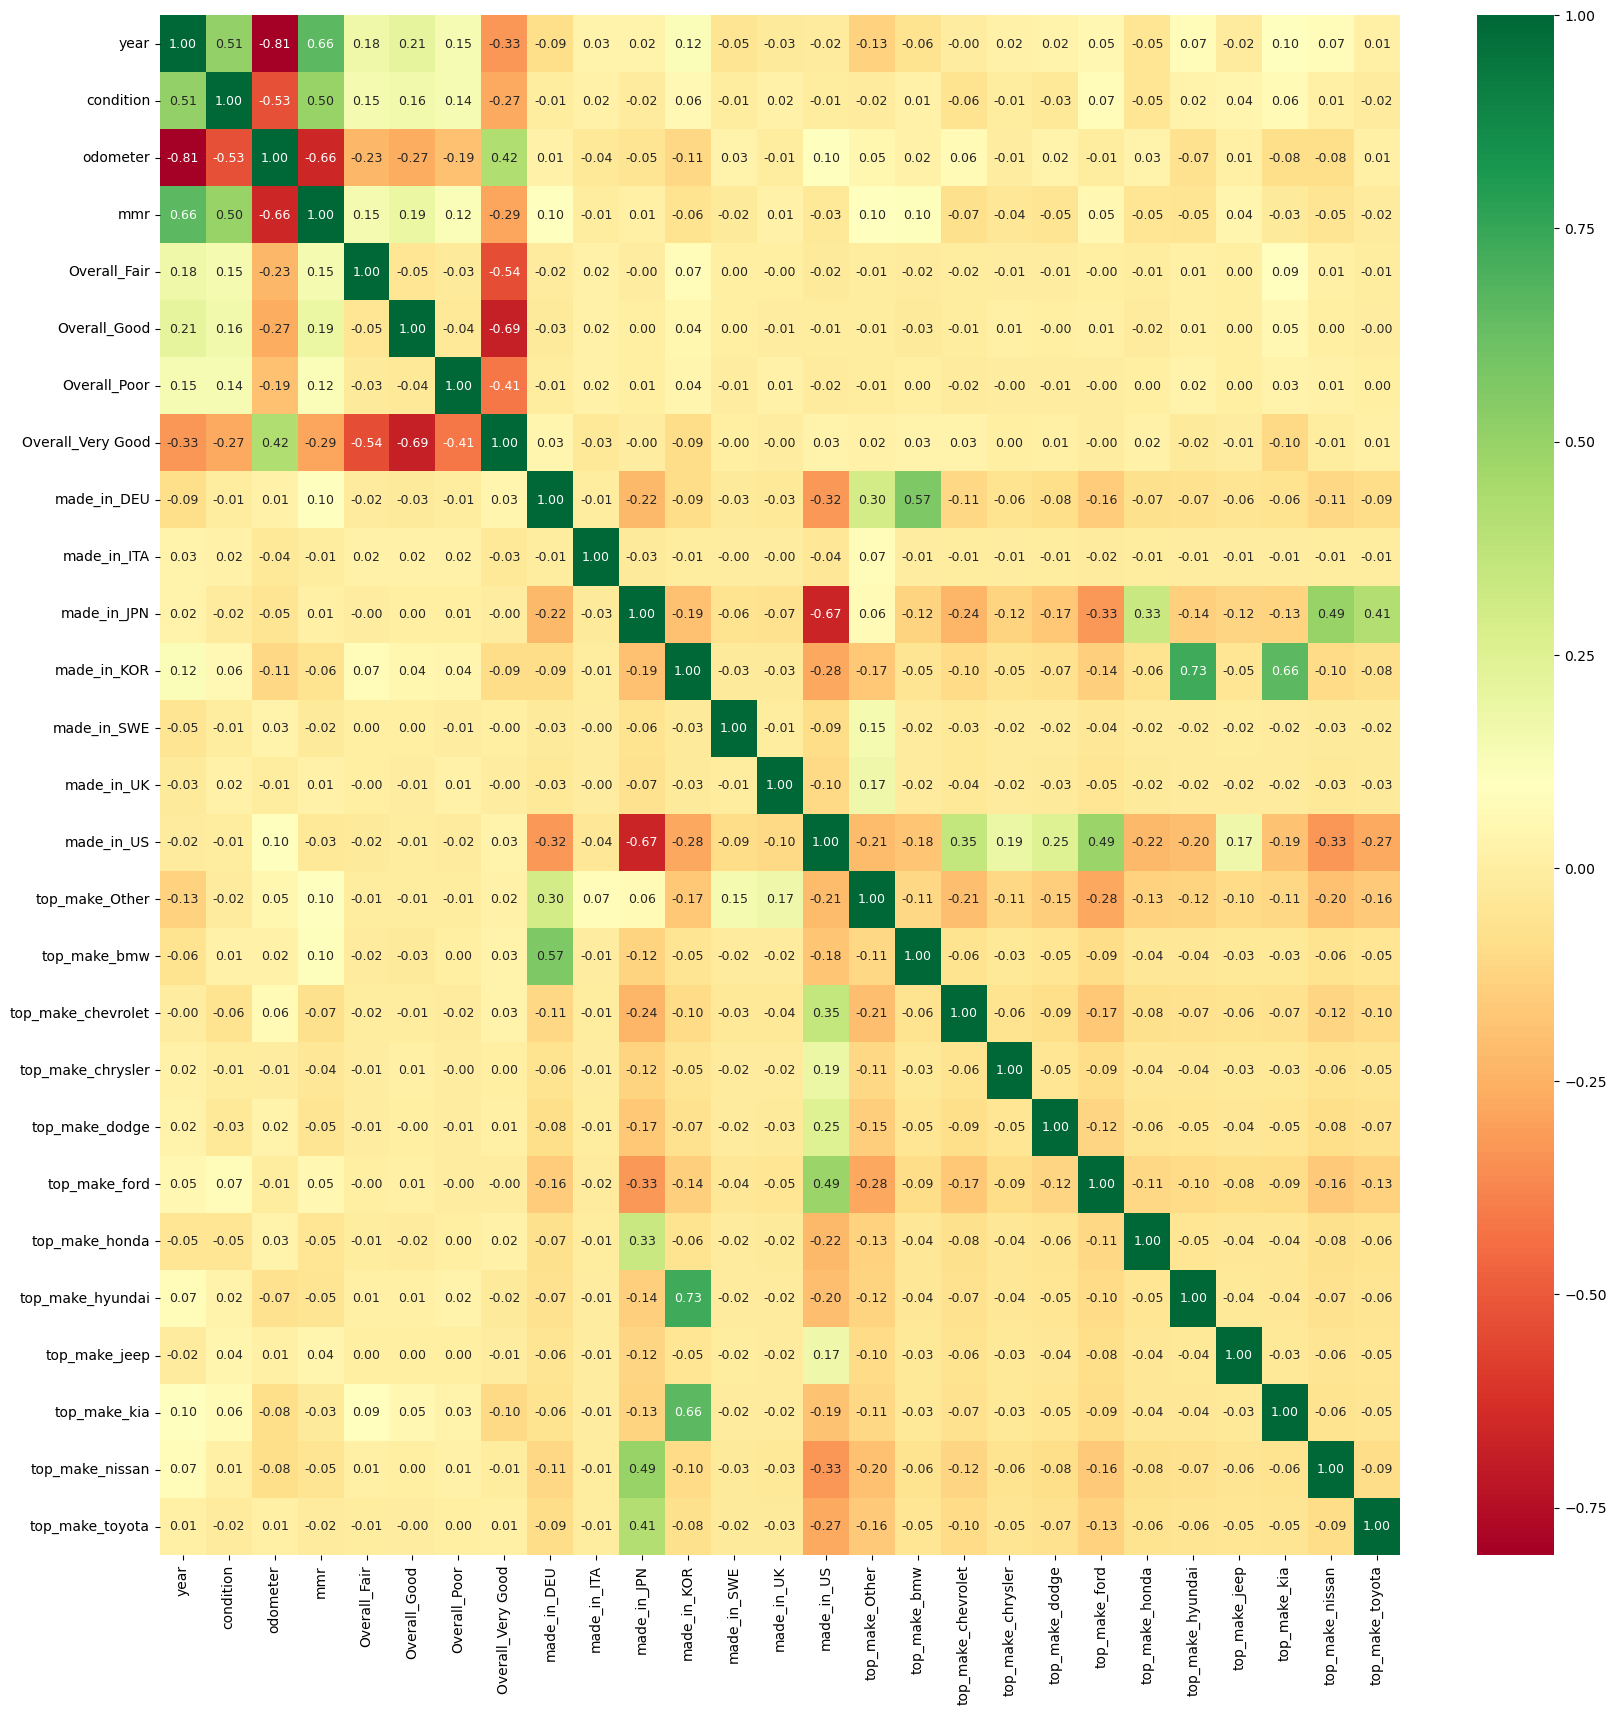

In [67]:
# Heatmap correlation plot
corr_matrix = df_pre.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn',annot_kws={'size': 9}, ax=ax)
plt.show()

#### Target Encoding
Target encoding is performed on several features to maintain important information contained in category features, especially in the context of target predictions.

In [68]:
#!pip install --upgrade category_encoders

In [69]:
from category_encoders import TargetEncoder

# Perform target encoding
cols = ['model', 'trim', 'body', 'state']
target = 'mmr'

encoder = TargetEncoder()
df_pre[cols] = encoder.fit_transform(df_pre[cols], df_pre[target])

#### Count Encoding
This method is used for categorical features where each value is replaced by its frequency of occurrence.

In [70]:
# Count encoding for 'seller' feature
count_encoding_seller = df_pre['seller'].value_counts().to_dict()
df_pre['seller'] = df_pre['seller'].map(count_encoding_seller)

In [71]:
# Count encoding for 'color' feature
count_encoding_seller = df_pre['color'].value_counts().to_dict()
df_pre['color'] = df_pre['color'].map(count_encoding_seller)

In [72]:
# Count encoding for 'interior' feature
count_encoding_seller = df_pre['interior'].value_counts().to_dict()
df_pre['interior'] = df_pre['interior'].map(count_encoding_seller)

## Train-Test Split

In [73]:
df_new = df_pre.copy()

In [74]:
from sklearn.model_selection import train_test_split

# Split features into train and test data
features = df_new.select_dtypes(["float64", "int64", "boolean", "uint8"]).columns
x = df_new[features].drop('mmr', axis=1)
y = df_new.mmr

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

### Pre-Processing

In [75]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler    = StandardScaler()
n = ['year', 'odometer', 'condition']
xtrain[n] = scaler.fit_transform(xtrain[n])
xtest[n] = scaler.transform(xtest[n])

In [76]:
xtrain.describe()

year      model       trim       body      state  condition  \
count 422244.000 422244.000 422244.000 422244.000 422244.000 422244.000   
mean       0.000  13095.089  13105.875  13089.124  13091.814      0.000   
std        1.000   4868.135   4465.104   2708.930   1804.508      1.000   
min       -3.312    825.353   1212.431   4901.736   7514.809     -2.640   
25%       -0.595   9808.195  10957.675  11370.412  12822.675     -0.795   
50%        0.492  12575.058  12242.339  11370.412  13271.470      0.181   
75%        0.764  16238.533  15207.488  15229.545  14033.186      0.832   
max        1.307  33180.335  32474.002  26420.066  17082.222      1.700   

        odometer      color   interior     seller  ...  top_make_chevrolet  \
count 422244.000 422244.000 422244.000 422244.000  ...          422244.000   
mean       0.000  82296.618 181267.947   4527.550  ...               0.108   
std        1.000  36264.403  77885.505   6103.314  ...               0.310   
min       -1.418     15.000     16.000      1.000  ...               0.000   
25%       -0.793  48926.000 170202.000    123.000  ...               0.000   
50%       -0.288  80152.000 170202.000   1633.000  ...               0.000   
75%        0.670  99592.000 248555.000   6069.000  ...               0.000   
max        2.994 127499.000 248555.000  19687.000  ...               1.000   

       top_make_chrysler  top_make_dodge  top_make_ford  top_make_honda  \
count         422244.000      422244.000     422244.000      422244.000   
mean               0.033           0.057          0.187           0.049   
std                0.178           0.232          0.390           0.216   
min                0.000           0.000          0.000           0.000   
25%                0.000           0.000          0.000           0.000   
50%                0.000           0.000          0.000           0.000   
75%                0.000           0.000          0.000           0.000   
max                1.000           1.000          1.000           1.000   

       top_make_hyundai  top_make_jeep  top_make_kia  top_make_nissan  \
count        422244.000     422244.000    422244.000       422244.000   
mean              0.041          0.028         0.034            0.101   
std               0.198          0.165         0.182            0.301   
min               0.000          0.000         0.000            0.000   
25%               0.000          0.000         0.000            0.000   
50%               0.000          0.000         0.000            0.000   
75%               0.000          0.000         0.000            0.000   
max               1.000          1.000         1.000            1.000   

       top_make_toyota  
count       422244.000  
mean             0.072  
std              0.258  
min              0.000  
25%              0.000  
50%              0.000  
75%              0.000  
max              1.000  

[8 rows x 33 columns]

# Modelling and Evaluation

## Modelling

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to display model evaluation scores
def eval_regression(model, y_pred, xtrain, xtest, ytrain,  ytest):
    print("MAE: " , mean_absolute_error(ytest, y_pred))
    print("RMSE: " , mean_squared_error(ytest, y_pred, squared=False))
    print('R2 score: ', r2_score(ytest, y_pred))
    print('Coefficients: ', regressor.coef_)
    print('Intercept: ', regressor.intercept_)

### Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression

# Training linear regression models
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

In [79]:
# Target prediction
y_pred = regressor.predict(xtest)

# Displays the linear regression model evaluation score
eval_regression(regressor, y_pred, xtrain, xtest, ytrain, ytest)

MAE:  2468.7388863081374
RMSE:  3340.3053011906363
R2 score:  0.8068971312419887
Coefficients:  [ 2.06677426e+03  4.79655556e-01  3.70676303e-01  3.79883087e-01
  1.18369415e-01  3.98138221e+02 -2.36723593e+03  3.12814470e-03
 -1.49719596e-03 -6.24261183e-02  5.02102915e+01  2.84025359e+02
 -2.66670624e+01 -3.07568589e+02  9.30405569e+02 -2.93142561e+03
  4.00449147e+02 -2.83667871e+03  1.78713769e+03  1.06328034e+03
  1.58683157e+03  5.42698428e+02  1.40855093e+03 -8.31644052e+02
 -1.44227461e+03 -1.35196823e+03 -1.52048951e+03  9.76061514e+02
  2.05889578e+03 -1.58437724e+03  1.54886486e+03 -2.50627743e+02
  4.46309871e+02]
Intercept:  -4656.973254761144


### Lasso Regression

In [80]:
from sklearn.linear_model import Lasso

# Training lasso regression model
lasso = Lasso(alpha=0.1, fit_intercept=True)
lasso.fit(xtrain, ytrain)

Lasso(alpha=0.1)

In [81]:
# Target prediction
y_pred = lasso.predict(xtest)

# Displays the lasso regression model evaluation score
eval_regression(lasso, y_pred, xtrain, xtest, ytrain, ytest)

MAE:  2468.790584640927
RMSE:  3340.335600872328
R2 score:  0.806893627980181
Coefficients:  [ 2.06677426e+03  4.79655556e-01  3.70676303e-01  3.79883087e-01
  1.18369415e-01  3.98138221e+02 -2.36723593e+03  3.12814470e-03
 -1.49719596e-03 -6.24261183e-02  5.02102915e+01  2.84025359e+02
 -2.66670624e+01 -3.07568589e+02  9.30405569e+02 -2.93142561e+03
  4.00449147e+02 -2.83667871e+03  1.78713769e+03  1.06328034e+03
  1.58683157e+03  5.42698428e+02  1.40855093e+03 -8.31644052e+02
 -1.44227461e+03 -1.35196823e+03 -1.52048951e+03  9.76061514e+02
  2.05889578e+03 -1.58437724e+03  1.54886486e+03 -2.50627743e+02
  4.46309871e+02]
Intercept:  -4656.973254761144


### Ridge Regression

In [82]:
from sklearn.linear_model import Ridge

# Training ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(xtrain, ytrain)

Ridge()

In [83]:
# Target Prediction
y_pred = ridge.predict(xtest)

# Displays the ridge regression model evaluation score
eval_regression(ridge, y_pred, xtrain, xtest, ytrain, ytest)

MAE:  2468.7510382828777
RMSE:  3340.31503233848
R2 score:  0.806896006126089
Coefficients:  [ 2.06677426e+03  4.79655556e-01  3.70676303e-01  3.79883087e-01
  1.18369415e-01  3.98138221e+02 -2.36723593e+03  3.12814470e-03
 -1.49719596e-03 -6.24261183e-02  5.02102915e+01  2.84025359e+02
 -2.66670624e+01 -3.07568589e+02  9.30405569e+02 -2.93142561e+03
  4.00449147e+02 -2.83667871e+03  1.78713769e+03  1.06328034e+03
  1.58683157e+03  5.42698428e+02  1.40855093e+03 -8.31644052e+02
 -1.44227461e+03 -1.35196823e+03 -1.52048951e+03  9.76061514e+02
  2.05889578e+03 -1.58437724e+03  1.54886486e+03 -2.50627743e+02
  4.46309871e+02]
Intercept:  -4656.973254761144


### Random Forest Regression

In [84]:
from sklearn.ensemble import RandomForestRegressor

# Training random forest model
rf = RandomForestRegressor(random_state=104, verbose=False)
rf.fit(xtrain, ytrain)

RandomForestRegressor(random_state=104, verbose=False)

In [85]:
# Target Prediction
ytrain_pred = rf.predict(xtrain)
ytest_pred = rf.predict(xtest)

In [86]:
# Displays the random forest model evaluation score
def evaluasi(model, ytrain_pred, ytest_pred, xtrain, xtest, ytrain,  ytest):
    print("MAE train: " , mean_absolute_error(ytrain, ytrain_pred))
    print("MAE test: " , mean_absolute_error(ytest, ytest_pred))
    print("RMSE train: " , mean_squared_error(ytrain, ytrain_pred, squared=False))
    print("RMSE test: " , mean_squared_error(ytest, ytest_pred, squared=False))
    print('R2 score train: ', r2_score(ytrain, ytrain_pred))
    print('R2 score test: ', r2_score(ytest, ytest_pred))

evaluasi(rf, ytrain_pred, ytest_pred, xtrain, xtest, ytrain, ytest)

MAE train:  249.24368197061415
MAE test:  675.3143389666736
RMSE train:  451.59455435411223
RMSE test:  1223.7941125480165
R2 score train:  0.9964442452180161
R2 score test:  0.9740801120792703


### CatBoost Regressor

In [87]:
!pip install catboost

In [88]:
from catboost import CatBoostRegressor

# Training catboost model
catboost = CatBoostRegressor(verbose=False)
catboost.fit(xtrain, ytrain)

In [89]:
# Target Prediction
ytrain_pred = catboost.predict(xtrain)
ytest_pred = catboost.predict(xtest)

# Displays the catboost model evaluation score
evaluasi(catboost, ytrain_pred, ytest_pred, xtrain, xtest, ytrain, ytest)

MAE train:  918.5333764968341
MAE test:  930.3384890568701
RMSE train:  1439.3781961134798
RMSE test:  1470.3113808830235
R2 score train:  0.9638769635308235
R2 score test:  0.9625859228072585


### XGBoost

In [90]:
!pip install xgboost

In [91]:
import xgboost as xgb

# Training XGBoost model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [92]:
# Target Prediction
ytrain_pred = xgb_regressor.predict(xtrain)
ytest_pred = xgb_regressor.predict(xtest)

# Displays the XGBoost model evaluation score
evaluasi(xgb_regressor, ytrain_pred, ytest_pred, xtrain, xtest, ytrain, ytest)

MAE train:  996.5324025827116
MAE test:  1017.8304054215453
RMSE train:  1542.2045484685923
RMSE test:  1594.284793279585
R2 score train:  0.9585314958685719
R2 score test:  0.95601058286356


Based on several models that have been tried, the best model is the **Random Forest** model because it has the highest R2 score and the smallest MAE and RMSE among the other models.

## Evaluation

### Feature Importance

Text(0.5, 1.0, 'Feature Importance Score')

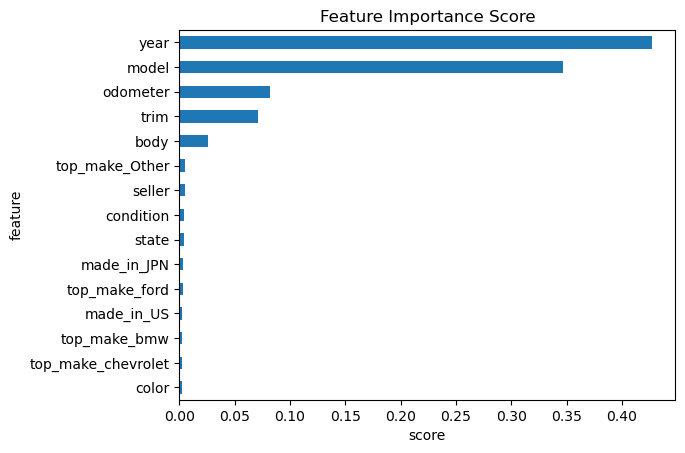

In [93]:
# Displays a feature importance plot
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
ax = feat_importances.nlargest(15).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('Feature Importance Score')

### SHAP Value

In [94]:
!pip install shap

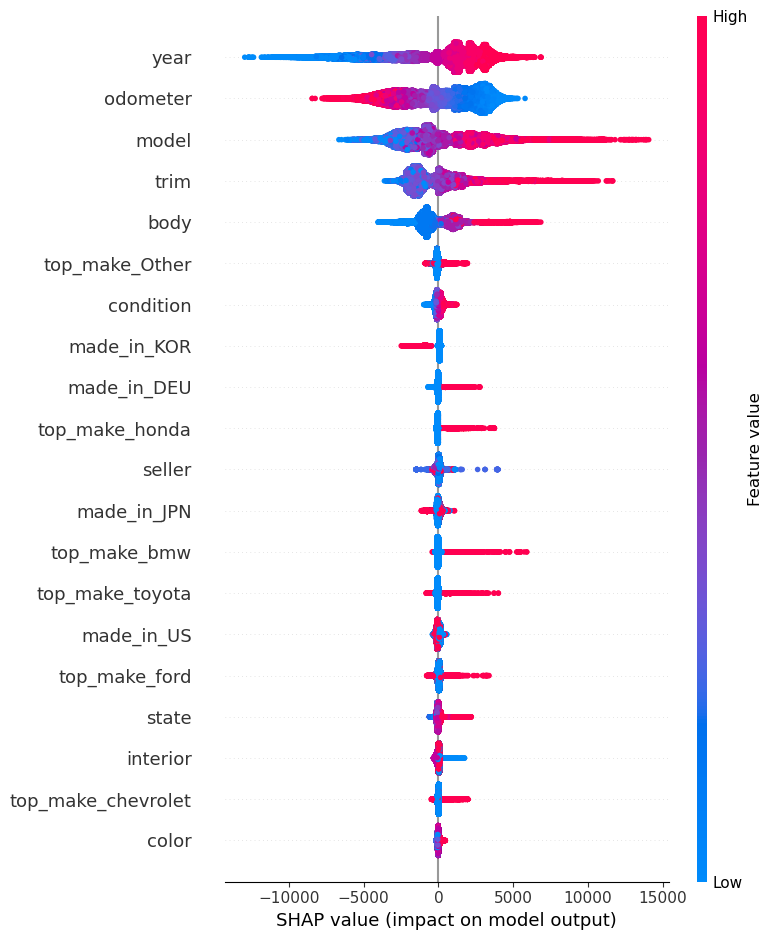

In [95]:
import shap

# Display SHAP Summary
explainer = shap.TreeExplainer(catboost)
shap_values = explainer.shap_values(xtest)
shap.summary_plot(shap_values, xtest)

### Cross Validation

In [96]:
from sklearn.model_selection import cross_validate

# Perform cross validation
SEED = 101
np.random.seed(SEED)

model_cv = RandomForestRegressor(verbose=False)
scores = cross_validate(model_cv, xtrain, ytrain, cv = 5, return_train_score=False)
media = scores['test_score'].mean()
std_dev = scores['test_score'].std()
print("Accuracy with cross validation, 5 = [%.2f%%, %.2f%%]" % ((media - 2 * std_dev)*100, (media + 2 * std_dev) * 100))

Accuracy with cross validation, 5 = [97.22%, 97.42%]


### New Selling Price

In [97]:
# Real Price X Predict Price
df_pred = pd.DataFrame(columns=['mmr', 'sellingprice_predicted'])
df_pred['mmr'] = ytest
rf_model = RandomForestRegressor(verbose=False)
rf_model.fit(xtrain, ytrain)
df_pred['sellingprice_predicted'] = rf_model.predict(xtest)
df_pred

mmr  sellingprice_predicted
262193   8775                8873.500
392466   8100                7615.000
524832  20300               19924.500
286417   2500                2704.000
323786  16050               15889.500
...       ...                     ...
274895  14800               14538.000
382225  14700               18652.500
495101  11600               12163.000
175086   5425                5221.000
181557  19100               18714.000

[105562 rows x 2 columns]

**Adding Selling Price Prediction Results into the Original Dataset.**

In [98]:
y_df = pd.DataFrame(data = df_pred, columns = ['sellingprice_predicted'], index = xtest.index.copy())
df_out = pd.merge(dfcar, y_df, how = 'left', left_index = True, right_index = True)
df_out.head()

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca      5.000 16639.000  white    black   
1  5xyktca69fg561319    ca      5.000  9393.000  white    beige   
2  wba3c1c51ek116351    ca      4.500  1331.000   gray    black   
3  yv1612tb4f1310987    ca      4.100 14282.000  white    black   
4  wba6b2c57ed129731    ca      4.300  2641.000   gray    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america, inc  20500         21500   
1                 kia motors america, inc  20800         21500   
2  financial services remarketing (lease)  31900         30000   
3                 volvo na rep/world omni  27500         27750   
4  financial services remarketing (lease)  66000         67000   

                                  saledate  sellingprice_predicted  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)                     NaN  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)                     NaN  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)               31075.000  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)                     NaN  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)                     NaN

In [99]:
df_compare = df_out.copy()

# Deleting predicted selling prices that have NaN values (unused data during modeling)
df_compare.dropna(subset = ['sellingprice_predicted'], inplace=True)

# Create a new column called 'is_below_mmr' for comparison.
df_compare['is_below_mmr'] = df_compare.apply(lambda x: 1 if x.sellingprice < x.mmr else 0, axis=1)
df_compare

year       make     model              trim         body transmission  \
2       2014        BMW  3 Series        328i SULEV        Sedan    automatic   
6       2014        BMW        M5              Base        Sedan    automatic   
7       2014  Chevrolet     Cruze               1LT        Sedan    automatic   
24      2014        BMW  6 Series              650i  Convertible    automatic   
26      2015      Volvo      XC70                T6        Wagon    automatic   
...      ...        ...       ...               ...          ...          ...   
527778  2008      Honda     Civic              EX-L        coupe    automatic   
527781  2008       Jeep  Wrangler  Unlimited Sahara          suv          NaN   
527792  2008       Jeep   Liberty   Limited Edition          suv    automatic   
527804  2008       Jeep   Liberty             Sport          suv    automatic   
527805  2008      Honda      CR-V                LX          suv    automatic   

                      vin state  condition   odometer   color interior  \
2       wba3c1c51ek116351    ca      4.500   1331.000    gray    black   
6       wbsfv9c51ed593089    ca      3.400  14943.000   black    black   
7       1g1pc5sb2e7128460    ca      2.000  28617.000   black    black   
24      wbayp9c57ed169262    ca      3.800  10736.000   black    black   
26      yv4902nb3f1198103    ca      4.200  16506.000   brown    brown   
...                   ...   ...        ...        ...     ...      ...   
527778  2hgfg12988h532869    fl      2.000 112319.000    gray      tan   
527781  1j4ga59168l648211    fl      3.400 102653.000  silver     gray   
527792  1j8gn58kx8w174565    mi      4.100  79975.000  silver     gray   
527804  1j8gp28k88w170782    tx      3.300  54575.000   white    beige   
527805  5j6re48388l011671    ga      3.500 153702.000    blue     gray   

                                                   seller    mmr  \
2                  financial services remarketing (lease)  31900   
6                                   the hertz corporation  69000   
7       enterprise vehicle exchange / tra / rental / t...  11900   
24                                  the hertz corporation  67000   
26                                volvo na rep/world omni  32100   
...                                                   ...    ...   
527778                        onemain rem/minas car group   6675   
527781                                            autobuy  17250   
527792                             automobiles paille inc  10850   
527804                                       auto mall 59   9275   
527805                                       gm financial   6575   

        sellingprice                                 saledate  \
2              30000  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)   
6              65000  Wed Dec 17 2014 12:30:00 GMT-0800 (PST)   
7               9800  Tue Dec 16 2014 13:00:00 GMT-0800 (PST)   
24             65000  Tue Jan 06 2015 12:30:00 GMT-0800 (PST)   
26             32500  Thu Feb 26 2015 04:30:00 GMT-0800 (PST)   
...              ...                                      ...   
527778          6200  Fri Jun 19 2015 03:20:00 GMT-0700 (PDT)   
527781         19000  Thu Jun 11 2015 02:10:00 GMT-0700 (PDT)   
527792         10000  Tue Jun 30 2015 06:30:00 GMT-0700 (PDT)   
527804          9600  Thu Jun 18 2015 03:30:00 GMT-0700 (PDT)   
527805          6800  Mon Jun 15 2015 17:00:00 GMT-0700 (PDT)   

        sellingprice_predicted  is_below_mmr  
2                    31075.000             1  
6                    31361.000             1  
7                    25515.000             1  
24                   20610.000             1  
26                   15068.000             0  
...                        ...           ...  
527778               22193.000             1  
527781               10014.000             0  
527792               11630.000             1  
527804               15804.500             0  
527805               24297.000 

The data above is the same data that was also used during modeling (105562 rows of data). The only difference is that the modeling results have been added in the form of new selling price values.

**Making Comparisons**

Using Original Dataset

In [100]:
# Grouping relative selling price to MMR before modeling
df_compare['is_below_mmr'] = df_compare.apply(lambda x: 1 if x.sellingprice < x.mmr else 0, axis=1)

transaction = df_compare.groupby('is_below_mmr').agg({'mmr':'count'}).rename({'mmr':'total_transaction'}, axis=1)
transaction['percentage'] = round(((transaction/transaction.sum())*100), 2)
transaction

total_transaction  percentage
is_below_mmr                               
0                         51136      48.440
1                         54426      51.560

In [101]:
# Calculate the average selling price and relative condition to MMR
def displayMeanSP(df):
    spAboveMMR=[]
    spBelowMMR=[]

    for index, row in df.iterrows():
      if row['is_below_mmr'] == 1:
        spBelowMMR.append(row['sellingprice'])
      else:
        spAboveMMR.append(row['sellingprice'])

    print(f'Mean of Selling Price above MMR = {sum(spAboveMMR)/len(spAboveMMR)}')
    print(f'Mean of Selling Price below MMR = {sum(spBelowMMR)/len(spBelowMMR)}')

displayMeanSP(df_compare)

Mean of Selling Price above MMR = 14816.63600985607
Mean of Selling Price below MMR = 12506.370062102671


Using Modeling Results

In [102]:
# Grouping reletive selling price to MMR after modeling
df_pred['is_below_mmr'] = df_pred.apply(lambda x: 1 if x.sellingprice_predicted < x.mmr else 0, axis=1)

transaction = df_pred.groupby('is_below_mmr').agg({'mmr':'count'}).rename({'mmr':'total_transaction'}, axis=1)
transaction['percentage'] = round(((transaction/transaction.sum())*100), 2)
transaction

total_transaction  percentage
is_below_mmr                               
0                         54688      51.810
1                         50874      48.190

In [103]:
# Calculate the average selling price and relative condition to MMR
def displayMeanSP(df):
    spAboveMMR=[]
    spBelowMMR=[]

    for index, row in df.iterrows():
      if row['is_below_mmr'] == 1:
        spBelowMMR.append(row['sellingprice_predicted'])
      else:
        spAboveMMR.append(row['sellingprice_predicted'])

    print(f'Mean of Selling Price above MMR = {sum(spAboveMMR)/len(spAboveMMR)}')
    print(f'Mean of Selling Price below MMR = {sum(spBelowMMR)/len(spBelowMMR)}')

displayMeanSP(df_pred)

Mean of Selling Price above MMR = 12765.349953371855
Mean of Selling Price below MMR = 13428.801421158156


By using a sample of 20%, a sales price prediction was obtained, which shows that the percentage of prices below mmr is 48.19%, where this figure shows a decrease of around 3% from the initial data and prices above mmr also experienced an increase of 3% compared to the initial data.

# Conclusion

After modeling, the average price under MMR is 13422. When compared with the average price of cars sold under MMR previously (12506), we can conclude that it is recommended that the car be sold for $916 (6.8%) higher so the seller can get more profits.

Likewise, the average car sold above mmr is 12775 compared to the previous one (14816). We recommend selling the car for $2041 (13.7%) less so that the price is not overpriced.